# <font style = "color:rgb(50,120,229)">Face Averaging</font>

In this module, we will learn how to create an average face. Consider the image below.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-averageFace.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-averageFace.jpg"/></a></center>

<center>Figure 1 : Computationally generated average face</center>

&nbsp;
Most people would agree that the woman in Figure 1 is pretty. Can you guess her ethnicity ? Why is her skin flawless ? Well, she is not real. She is not completely virtual either. Her face is the average face of all female employees who worked at our company, Sight Commerce Inc., around 2011. It is difficult to pinpoint her ethnicity because, thanks to our excellent diversity record, she is part Caucasian, part Hispanic, part Asian and part Indian!

## <font style = "color:rgb(50,120,229)">History of Face Averaging</font>

The history of face averaging is fascinating.

It all started with **Francis Galton** ( cousin of Charles Darwin ) who, back in 1878, came up with a new photographic technique for compositing faces by aligning the eyes. He thought that by averaging faces of criminals he could create the prototypical criminal face which in turn would help predict if someone is a criminal based on their facial features. His hypothesis turned out to be wrong; you cannot predict if a person is a criminal by looking at their photos.

## <font style = "color:rgb(50,120,229)">Attractiveness of Average Faces</font>

Even in failure, great scientists find interesting observations. Galton noted that the average face was always more attractive than the faces it was the average of. 

Several researchers in the 1990s showed that people find facial averages much more attractive than individual faces. In one [amusing experiment](http://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/missgermany/missgermany.htm) researchers averaged the faces of 22 miss Germany finalists of 2002. People rated the average face to be much more attractive than every one of the 22 contestants, including miss Berlin who won the competition. Ouch! 

Turns out Jessica Alba’s face is attractive precisely because her face is close to the average!

Shouldn’t an average be mediocre by definition? Why do we find an average face attractive? According to an evolutionary hypothesis called **Koinophilia**, sexually reproducing animals seek mates with average features because deviations from the average could indicate disadvantageous mutations. An average face is also symmetric because the variations in the left side and the right side of the face are averaged out.

The image below shows the average of 6 Presidents of US on the right and their individual faces  on the left.

<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-CarterToObama.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-CarterToObama.jpg"/></a></center>
    <center>Figure 2 : Average face of US Presidents : Carter to Obama.</center>

&nbsp;
# <font style = "color:rgb(50,120,229)">Similarity Transform</font>

We have dicusssed the Affine transform at length in previous modules. In this module, we will see a special case of Affine transform called the Similarity transform. Remember, the Affine transform was a combination of translation, scale, rotation, and shear (skew). 

> <font style="font-family:Poiret one" size="+2">A Similarity transform is an Affine transform without any shear</font>

Just like the Affine transform, a Similarity transform is represented using 2x3 matrix that can be used to transform the location of points **(x,y)** or an entire image. The first two columns of this matrix encodes rotation and scale, and the last column encodes translation ( i.e. shift ). Let’s say you want to transform (move) the four corners of a square so that the square is scaled in the **x** and **y** direction by **s~x~** and **s~y~** respectively. At the same time it is rotated by an angle **𝛳**, and translated ( moved ) by **t~x~** and **t~y~** in the x and y directions. The similarity transform for this can be written as :
 $$
 S=\begin{bmatrix}
s_xcos(\theta) & sin(\theta) & t_x\\
-sin(\theta) & s_ycos(\theta) & t_y\\
\end{bmatrix}
 $$

Given, a point  **(x,y)**, the above similarity transform, moves it to point **(x~t~,y~t~)** using the equation given below :
 $$
 \begin{bmatrix}
 x_t\\
 y_t\\
 \end{bmatrix}=\begin{bmatrix}
s_xcos(\theta) & sin(\theta) \\
-sin(\theta) & s_ycos(\theta) \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix} +
\begin{bmatrix}
t_x \\
t_y \\
\end{bmatrix}
 $$

# <font style = "color:rgb(50,120,229)">How to create an average face using OpenCV ?</font>

The steps for generating an average face given a set of facial images is described below. We make no assumptions about the size of the images or the size the faces in the images.

## <font style = "color:rgb(50,120,229)">Step 1 : Facial Feature Detection</font>

For each facial image we calculate 68 facial landmarks using **Dlib**. Details about obtaining the landmark points were  already covered in the module on **Facial Landmark Detection**. The figure below shows the 68 landmark points.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-facialFeature.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-facialFeature.jpg"/></a></center>
<center>Figure 3 : Facial feature detection example.</center>

## <font style = "color:rgb(50,120,229)">Step 2 : Coordinate Transformation</font>

The input facial images can be of very different sizes. So we need a way to normalize the faces and bring them to the same reference frame.  To achieve this we warp the faces to a 600×600 image such that the left corner of the left eye is at pixel location ( 180, 200 ) and the right corner of the right eye is at pixel location ( 420, 200 ). Let us call this coordinate system the **output coordinate system** and the coordinates of the original images the **input coordinate systems**.

How were the above points chosen ? We wanted to make sure the points were on a horizontal line, and the face was centered at about a third of the height from the top of the image.  So we chose the corners of the eyes to be at ( 0.3 x width, height / 3 ) and ( 0.7 x width , height / 3 ).

We also know the location of the corners of the eyes in the original images; they are landmarks 36 and 45 respectively. We can therefore calculate a **similarity transform** ( rotation , translation and scale ) that transforms the points from the **input coordinate systems** to the **output coordinate system**.The table below shows the original 3000 X 2300 image on the left and the transformed 600 X 600 image on the right.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-similaritytransform.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-similaritytransform.jpg"/></a></center>
    <center>Figure 4 : Similarity transform used to convert the input image of size 3000×2300 to output image coordinates of size 600×600.</center>

&nbsp;
To find the similarity transform that will transform the points from the **input image coordinates** to the **output image coordinates**. To do this, we can use **estimateAffinePartial2D** function.

```python
retval, inliers	=	cv.estimateAffinePartial2D(	from, to[, inliers[, method[, ransacReprojThreshold[, maxIters[, confidence[, refineIters]]]]]]	)
```
 
Where,

- **`from`** - First input 2D point set.
- **`to`** - Second input 2D point set.
- **`inliers`** - Output vector indicating which points are inliers.
- **`method`** - Robust method used to compute transformation. The following methods are possible:
  - **`cv.RANSAC`** - RANSAC-based robust method
  - **`cv.LMEDS`** - Least-Median robust method RANSAC is the default method.
- **`ransacReprojThreshold`** - Maximum reprojection error in the RANSAC algorithm to consider a point as an inlier. Applies only to RANSAC.
- **`maxIters`** - The maximum number of robust method iterations.
- **`confidence`** - Confidence level, between 0 and 1, for the estimated transformation. Anything between 0.95 and 0.99 is usually good enough. Values too close to 1 can slow down the estimation significantly. Values lower than 0.8-0.9 can result in an incorrectly estimated transformation.
- **`refineIters`** - Maximum number of iterations of refining algorithm (Levenberg-Marquardt). Passing 0 will disable refining, so the output matrix will be output of robust method.

There is one little problem though. OpenCV requires you to supply at least 3 point pairs. We can simply hallucinate a third point such that it forms an equilateral triangle with the two known points and then use **estimateAffinePartial2D** as if we had three points pairs.

Once a similarity transform is calculated, it can be used to transform the input image and the landmarks to the output coordinates. The image is transformed using **warpAffine** and the points are transformed using the **transform** function.

First, we show the code for calculating the similarity transform using two points. 

OpenCV’s estimateAffinePartial2D requires 3 points for calculating similarity matrix.

Using trigonometry, we are hallucinating the third point, so that the three points form an equilateral triangle. 

Note this third point be chosen above or below the line joining the two points. It does not matter which of the two solutions you choose as long as you are consistent. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.
def similarityTransform(inPoints, outPoints):
  s60 = math.sin(60*math.pi/180)
  c60 = math.cos(60*math.pi/180)

  inPts = np.copy(inPoints).tolist()
  outPts = np.copy(outPoints).tolist()

  # The third point is calculated so that the three points make an equilateral triangle
  xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0]
  yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1]

  inPts.append([np.int(xin), np.int(yin)])

  xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0]
  yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1]

  outPts.append([np.int(xout), np.int(yout)])

  # Now we can use estimateRigidTransform for calculating the similarity transform.
  tform = cv2.estimateAffinePartial2D(np.array([inPts]), np.array([outPts]))
  return tform[0]

The function normalizeImagesAndLandmarks normalizes a facial image to a standard size given by outSize.

The normalization is done based on Dlib's landmark points passed as pointsIn. The two corners of the eyes, are used for normalization.

After the normalization, the left corner of the left eye is at (0.3 * w, h/3 ) and the right corner of the right eye is at ( 0.7 * w, h / 3) where w and h are the width and height of outSize.

In [4]:
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  eyecornerSrc = [pointsIn[36], pointsIn[45]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)), 
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  
  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform, (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, 
                      (pointsIn.shape[0], 1, pointsIn.shape[1]))
  
  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform)

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, 
                        (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

## <font style = "color:rgb(50,120,229)">Step 3 : Face Alignment</font>

In the previous step, we were able to transform all the images and the landmarks to the output image coordinates. All the images are now of the same size, and the two corners of the eyes are aligned. It may be tempting to obtain the average image by averaging pixel values of these aligned images. However if you did this, you will end up with an image shown just below. Sure, the eyes are aligned, but other facial features are misaligned.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-naiveFaceAveraging.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-naiveFaceAveraging.jpg"/></a></center>
<center>Figure 5 : Result of naive face averaging</center>

&nbsp;
Next, we use a trick to align all the facial features. If we knew which point in one input image corresponded to which point in another input image we could easily align the two images perfectly. However, we do not have that information. We only know the locations of 68 corresponding points in the input images. We will use these 68 points to divide the images into triangular regions. and align these regions before averaging pixel values.

### <font style = "color:rgb(50,120,229)">Calculate Mean Face Points</font>

To calculate the average face where the features are aligned, we first need to calculate the average of all transformed landmarks in the output image coordinates. This is done by simply averaging the x and y values of the landmarks in the **output image coordinates**.

### <font style = "color:rgb(50,120,229)">Calculate Delaunay Triangulation</font>
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-elaunyTriangulationOfAverageLandmarkPoints.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-elaunyTriangulationOfAverageLandmarkPoints.jpg"/></a></center>
<center>Figure 6 : Delaunay Triangulation of average                                       landmark points.</center>

&nbsp;
In the previous step we obtained the landmark locations for the average face in the **output image coordinates**. We can use these 68 points (shown above in blue in Figure 6 ), and 8 points on the boundary of the output image (shown above  in green in Figure 6 ) to calculate a Delaunay Triangulation ( shown above  in red in Figure 6 ). 

Delaunay triangulation allows us to break the image into triangles.  The result of Delaunay triangulation is a list of triangles represented by the indices of points in the 76 points ( 68 face points + 8 boundary points ) array. In the triangulation example shown below in the box, we see than landmarks 62, 68 and 60 form a triangle, and 32, 50, and 49 form another triangle and so on.

#### <font style = "color:rgb(8,133,37)">Triangulation Example</font>
```
[
62 68 60
32 50 49
15 16 72
9 8 58
53 35 36
…  ]
```


### <font style = "color:rgb(50,120,229)">Warp Triangles</font>

In the previous step we calculated the average location of facial landmarks and used these locations to calculate a Delaunay triangulation to divide the image into triangles. In Figure 7 below, the left image shows Delaunay triangles on the transformed input image and the middle image shows the triangulation on the average landmarks. Note that triangle 1 in the left image corresponds to triangle 1 in the middle image. The three vertices of triangle 1 in the left image and the corresponding vertices in the middle image can be used to calculate an affine transform. This affine transform can be used to transform all pixels inside triangle 1 in the left image to triangle 1 in the middle image. This procedure when repeated for every triangle in the left image, results in the right image. The right image is simply the left image warped to the average face.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-warpingBasedDelauny.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-warpingBasedDelauny.jpg"/></a></center>
<center>Figure 7 : Image Warping based on Delaunay Triangulation.</center>

The function warpImage warps an image in a piecewise affine manner. 

The warp is defined by the movement of landmark points specified by pointsIn to a new location specified by pointsOut. In face averaging, pointsIn is the vector of normalized points and pointsOut is the vector of average points. 

The triangulation between points is specified by their indices in delaunayTri.

The collection of triangles in the input image is warped to the corresponding triangle in the output image using warpTriangle. 

In [5]:
# Warps an image in a piecewise affine manner.
# The warp is defined by the movement of landmark points specified by
# pointsIn to a new location specified by pointsOut. 
# The triangulation beween points is specified by 
# their indices in delaunayTri.
def warpImage(imIn, pointsIn, pointsOut, delaunayTri):
  h, w, ch = imIn.shape
  # Output image
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Warp each input triangle to output triangle.
  # The triangulation is specified by delaunayTri
  for j in range(0, len(delaunayTri)):
    # Input and output points corresponding to jth triangle
    tin = []
    tout = []

    for k in range(0, 3):
      # Extract a vertex of input triangle
      pIn = pointsIn[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pIn = constrainPoint(pIn, w, h)

      # Extract a vertex of the output triangle
      pOut = pointsOut[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pOut = constrainPoint(pOut, w, h)

      # Push the input vertex into input triangle
      tin.append(pIn)
      # Push the output vertex into output triangle
      tout.append(pOut)

    # Warp pixels inside input triangle to output triangle.
    warpTriangle(imIn, imOut, tin, tout)
  return imOut

## <font style = "color:rgb(50,120,229)">Step 4 : Face Averaging</font>

The previous step, when applied to all input images, gives us images that are correctly warped to the average image landmark coordinates. To calculate the average image, we can simply add the pixel intensities of all warped images and divide by the number of images. Figure 2 shows the result of this averaging. It looks much better than the average we obtained in Figure 5.

### <font style = "color:rgb(50,120,229)">Face Averaging Code and Tutorial</font>

Let’s dive into the code to understand the implementation of Face Averaging. 

In [6]:
import faceBlendCommon as fbc
import dlib
import os

Function to read the all jpg files in the specified directory

In [7]:
# Read all jpg image paths in folder.
def readImagePaths(path):
  # Create array of array of images.
  imagePaths = []
  # List all files in the directory and read points from text files 
  for filePath in sorted(os.listdir(path)):
    fileExt = os.path.splitext(filePath)[1]
    if fileExt in [".jpg", ".jpeg"]:
      print(filePath)

      # Add to array of images
      imagePaths.append(os.path.join(path, filePath))

  return imagePaths

In [8]:
# Landmark model location
PREDICTOR_PATH = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"

In [9]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

dirName = DATA_PATH + "images/presidents"

In [10]:
# Read all images
imagePaths = readImagePaths(dirName)

if len(imagePaths) == 0:
    print('No images found with extension jpg or jpeg')

barak-obama.jpg
bill-clinton.jpg
george-h-bush.jpg
george-w-bush.jpg
jimmy-carter.jpg
ronald-regan.jpg


Read all images and perform landmark detection.


In [11]:
# Read images and perform landmark detection.
images = []
allPoints = []

for imagePath in imagePaths:
    im = cv2.imread(imagePath)
    if im is None:
        print("image:{} not read properly".format(imagePath))
    else:
        points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
        if len(points) > 0:
            allPoints.append(points)

            im = np.float32(im)/255.0
            images.append(im)
        else:
            print("Couldn't detect face landmarks")

Warp all images and landmark points to the output image coordinates. 

This is followed by calculating the average of all landmark points. This mean shape is stored in the vector pointsAvg. 

The eight boundary points of the output image are added to pointsAvg. These 76 ( 68 landmarks + 8 boundary ) points are used for Delaunay triangulation. 

In [12]:
# Dimensions of output image
w = 600
h = 600

# 8 Boundary points for Delaunay Triangulation
boundaryPts = fbc.getEightBoundaryPoints(h, w)

numImages = len(imagePaths)
numLandmarks = len(allPoints[0])

# Variables to store normalized images and points.
imagesNorm = []
pointsNorm = []

# Initialize location of average points to 0s
pointsAvg = np.zeros((numLandmarks, 2), dtype=np.float32)

# Warp images and trasnform landmarks to output coordinate system,
# and find average of transformed landmarks.
for i, img in enumerate(images):

    points = allPoints[i]
    points = np.array(points)

    img, points = fbc.normalizeImagesAndLandmarks((h, w), img, points)

    # Calculate average landmark locations
    pointsAvg = pointsAvg + (points / (1.0*numImages))

    # Append boundary points. Will be used in Delaunay Triangulation
    points = np.concatenate((points, boundaryPts), axis=0)

    pointsNorm.append(points)
    imagesNorm.append(img)

# Append boundary points to average points.
pointsAvg = np.concatenate((pointsAvg, boundaryPts), axis=0)

Finally, every normalized image is warped to the the mean shape. 

This is done by passing the normalized image, the normalized points, the average points and the Delaunay triangulation to the function warpImage. 

In a previous lecture, we learned how to warp one triangle in an image into another triangle in a different image. The same logic is used by warpImage to warp the entire image to the mean shape one triangle at a time. 

Even though it was explained earlier, it is worth revisiting how warpImage works. 

On the left hand side are the normalized points displayed on the image. In the middle image we see the mean shape. Delaunay triangulation was calculated using this mean shape. 

Corresponding triangles in the left image are warped to the mean shape. For example, the triangle marked 1 in the left image is warped to the triangle marked 1 in the middle image. This process is repeated for every triangle to obtain the image on the right. 

:::
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-warpingBasedDelauny.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-warpingBasedDelauny.jpg"/></a></center>

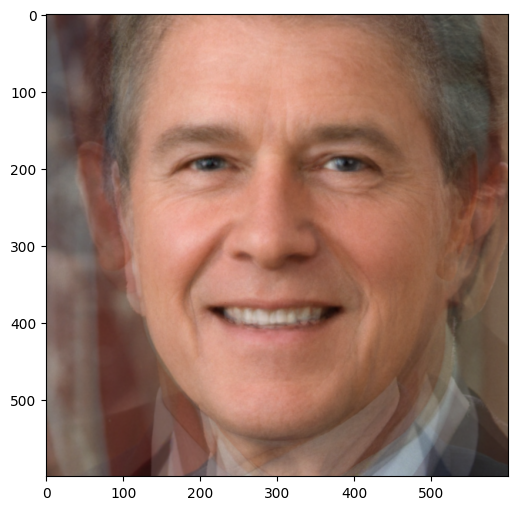

In [14]:
# Delaunay triangulation
rect = (0, 0, w, h)
dt = fbc.calculateDelaunayTriangles(rect, pointsAvg)

# Output image
output = np.zeros((h, w, 3), dtype=float)

# Warp input images to average image landmarks
for i in range(0, numImages):

    imWarp = fbc.warpImage(imagesNorm[i], pointsNorm[i], 
                            pointsAvg.tolist(), dt)

    # Add image intensities for averaging
    output = output + imWarp

# Divide by numImages to get average
output = output / (1.0*numImages)

# Display result
plt.imshow(output[:,:,::-1])
plt.show()

## <font style = "color:rgb(50,120,229)">Some more examples on Face Averaging</font>
<table>
    <tr>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-mark.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-mark.jpg" /></a></center></th>
        <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-faceAverageBrie.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-faceAverageBrie.jpg" /></a></center></th>
    </tr>   
    <tr>
        <td colspan="2">Figure in left is the Facial Average of Mark Zuckerberg, Larry Page, Elon Musk and Jeff Bezos and the figure in the right is the Facial Average of last four best actress winners : Brie Larson, Julianne Moore, Cate Blanchett and Jennifer Lawrence</td>
    </tr>
</table>

## <font style = "color:rgb(50,120,229)">Making a Face Symmetric</font>

You can also make a symmetric face, by averaging a face and its mirror reflection. An example is shown below.
<center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-obama.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m4-obama.jpg" /></a></center>
<center>Figure 10 : President Obama made symmetric (center) by averaging his image (left) with its mirror reflection (right).</center>

# <font style = "color:rgb(50,120,229)">References and Further Reading</font>

1. [http://faceresearch.org/demos/average](http://faceresearch.org/demos/average)

2. [http://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/missgermany/missgermany.htm](http://www.uni-regensburg.de/Fakultaeten/phil_Fak_II/Psychologie/Psy_II/beautycheck/english/missgermany/missgermany.htm)

3. [http://galton.org/composite.htm](http://galton.org/composite.htm)